<a href="https://colab.research.google.com/github/jpscard/I2A2_AI_Industry_Desafios/blob/main/Pump_sensor_data_EDA_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1 - Importando as bibliotecas**

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
#fazer upload de arquivo
from google.colab import files
#carregar dataset
from pandas import read_csv

## **2 - Importando e carregando o dataset**

In [2]:
# Para fazer o upload do dataset, método opcional. Rodar apenas uma vez no inicio 
uploaded = files.upload()

In [3]:
#carregar o dataset
df=pd.read_csv('/content/sensor.csv')

## **3 - Limpeza de dados**

In [4]:
# Para exibir as 5 primeiras linhas do dataframe
df.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [5]:
#Informação sobre o formato do dataframe
df.shape

(220320, 55)

In [6]:
# Algumas informaçoes sobre o dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      220320 non-null  int64  
 1   timestamp       220320 non-null  object 
 2   sensor_00       210112 non-null  float64
 3   sensor_01       219951 non-null  float64
 4   sensor_02       220301 non-null  float64
 5   sensor_03       220301 non-null  float64
 6   sensor_04       220301 non-null  float64
 7   sensor_05       220301 non-null  float64
 8   sensor_06       215522 non-null  float64
 9   sensor_07       214869 non-null  float64
 10  sensor_08       215213 non-null  float64
 11  sensor_09       215725 non-null  float64
 12  sensor_10       220301 non-null  float64
 13  sensor_11       220301 non-null  float64
 14  sensor_12       220301 non-null  float64
 15  sensor_13       220301 non-null  float64
 16  sensor_14       220299 non-null  float64
 17  sensor_15 

In [7]:
# Converter timestamp para tipo datetimeIndex (necessário para analisar a série temporal)
df.timestamp=pd.to_datetime(df.timestamp)

In [8]:
# Converter coluna machine_status para dado do tipo categorico 
df.machine_status=df.machine_status.astype('category')

In [9]:
# Converter timestamp para o indice (necessário para a análise temporal, fornece um único ponto no tempo)
df.set_index('timestamp',inplace=True)

In [10]:
# Descartar coluna do sensor_15, por conta de valores nulos
df.drop(columns=['sensor_15'],inplace=True)
# Descartar primeira coluna
df.drop(columns=['Unnamed: 0'],inplace=True)

In [11]:
# Verificar se há valores NaN (not a number)
missing_count= df.isnull().sum() # Para contabilizar valores nulos
value_count=df.isnull().count()
missing_percentage=round(missing_count/value_count *100, 1) # Para indicar o percentual de valores nulos
missing_df= pd.DataFrame({"quantidade": missing_count, "percentual": missing_percentage})
print(missing_df)

                quantidade  percentual
sensor_00            10208         4.6
sensor_01              369         0.2
sensor_02               19         0.0
sensor_03               19         0.0
sensor_04               19         0.0
sensor_05               19         0.0
sensor_06             4798         2.2
sensor_07             5451         2.5
sensor_08             5107         2.3
sensor_09             4595         2.1
sensor_10               19         0.0
sensor_11               19         0.0
sensor_12               19         0.0
sensor_13               19         0.0
sensor_14               21         0.0
sensor_16               31         0.0
sensor_17               46         0.0
sensor_18               46         0.0
sensor_19               16         0.0
sensor_20               16         0.0
sensor_21               16         0.0
sensor_22               41         0.0
sensor_23               16         0.0
sensor_24               16         0.0
sensor_25               3

In [12]:
# Encontrar o número de dias em que os dados foram coletados
df.index.max() - df.index.min()

Timedelta('152 days 23:59:00')

In [13]:
# Verificar se não há duplicação no indice 
df.index.is_unique

True

### **Os dados iniciais mostram que existem 52 sensores (um por cada coluna) que registraram dados a cada 1 minuto. Possuindo 220320 registros, com isso, o presente conjunto de dados representa um período de 153 dias. Além disso, as medições têm escalas diferentes.**

In [14]:
# Descartar coluna do sensor_50, sensor_51 e sensor_00 por apresentarem muitos valores NaN, e possuir porcentagem de nulos muito maiores que 2%
df.drop(columns=['sensor_50','sensor_51','sensor_00'],inplace=True)

In [15]:
missing_count= df.isnull().sum() # Exibe a quantidade de valores nulos 
value_count=df.isnull().count()
missing_percentage=round(missing_count/value_count *100, 1) # Exibe o percentual de valores nulos
missing_df= pd.DataFrame({"Quantidade": missing_count, "Porcentagem": missing_percentage})
print(missing_df)

                Quantidade  Porcentagem
sensor_01              369          0.2
sensor_02               19          0.0
sensor_03               19          0.0
sensor_04               19          0.0
sensor_05               19          0.0
sensor_06             4798          2.2
sensor_07             5451          2.5
sensor_08             5107          2.3
sensor_09             4595          2.1
sensor_10               19          0.0
sensor_11               19          0.0
sensor_12               19          0.0
sensor_13               19          0.0
sensor_14               21          0.0
sensor_16               31          0.0
sensor_17               46          0.0
sensor_18               46          0.0
sensor_19               16          0.0
sensor_20               16          0.0
sensor_21               16          0.0
sensor_22               41          0.0
sensor_23               16          0.0
sensor_24               16          0.0
sensor_25               36          0.0


### **Foi realizado uma limpeza na tabela inicial, além do indice inicial "Unnamed: 0" a eliminação de sensores que possuiam um percentual bem maior que 2% de dados faltantes ou valores NaN(not a number), especificamente, os sensores: sensor_00, sensor_15, sensor_50 e sensor_51.**

# **4 - Análise exploratória de dados**

In [16]:
# Transformando machine_status de string para tipo inteiro 
conditions = [(df['machine_status'] =='NORMAL'), (df['machine_status'] =='BROKEN'), (df['machine_status'] =='RECOVERING')]
choices = [1, 0, 2] # 3 OBSERVAÇÕES
df['Operation'] = np.select(conditions, choices, default=0)

In [17]:
# Estatística básica do dataset
df.describe()

,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,...,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,Operation
count,219951.000000,220301.000000,220301.000000,220301.000000,220301.000000,215522.000000,214869.000000,215213.000000,215725.000000,220301.000000,...,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220320.000000
mean,47.591611,50.867392,43.752481,590.673936,73.396414,13.501537,15.843152,15.200721,14.799210,41.470339,...,35.365126,35.453455,43.879591,42.656877,43.094984,48.018585,44.340903,150.889044,57.119968,1.065677
std,3.296666,3.666820,2.418887,144.023912,17.298247,2.163736,2.201155,2.037390,2.091963,12.093519,...,7.898665,10.259521,11.044404,11.576355,12.837520,15.641284,10.442437,82.244957,19.143598,0.247846
min,0.000000,33.159720,31.640620,2.798032,0.000000,0.014468,0.000000,0.028935,0.000000,0.000000,...,20.833330,22.135416,24.479166,25.752316,26.331018,26.331018,27.199070,26.331018,26.620370,0.000000
25%,46.310760,50.390620,42.838539,626.620400,69.976260,13.346350,15.907120,15.183740,15.053530,40.705260,...,32.552080,32.812500,39.583330,36.747684,36.747684,40.509258,39.062500,83.912030,47.743060,1.000000
50%,48.133678,51.649300,44.227428,632.638916,75.576790,13.642940,16.167530,15.494790,15.082470,44.291340,...,34.895832,35.156250,42.968750,40.509260,40.219910,44.849540,42.534720,138.020800,52.662040,1.000000
75%,49.479160,52.777770,45.312500,637.615723,80.912150,14.539930,16.427950,15.697340,15.118630,47.463760,...,37.760410,36.979164,46.614580,45.138890,44.849540,51.215280,46.585650,208.333300,60.763890,1.000000
max,56.727430,56.032990,48.220490,800.000000,99.999880,22.251160,23.596640,24.348960,25.000000,76.106860,...,420.312500,374.218800,408.593700,1000.000000,320.312500,370.370400,303.530100,561.632000,464.409700,2.000000


In [18]:
# Pegar colunas e linhas úteis
sensor_cols = df.iloc[:,1:49]
broken_rows = df[df['machine_status']=='BBROKEN']
recovery_rows = df[df['machine_status']=='RECOVERING']
normal_rows = df[df['machine_status']=='NORMAL']
machine_status_col = df['machine_status']

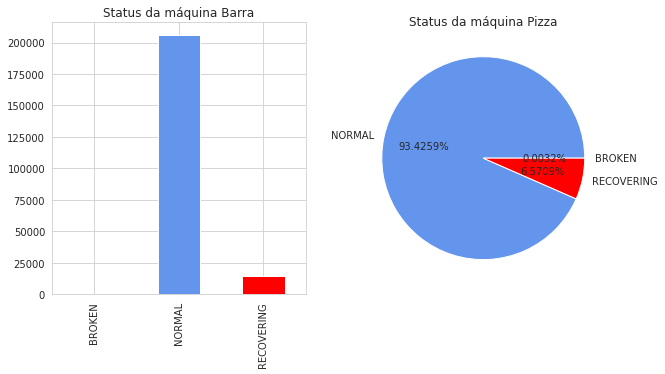

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
df.groupby('machine_status').size().plot(kind='bar', ax=ax1, color=['black', 'cornflowerblue', 'red'])
df.groupby('machine_status').size().plot(kind='pie', ax=ax2, autopct='%.4f%%', colors=['black', 'cornflowerblue', 'red'])
ax1.set_title('Status da máquina Barra')
ax1.set_xlabel('')
ax2.set_title('Status da máquina Pizza')
ax2.set_ylabel('')
plt.show()

In [20]:
# Exibir quantidade por classe
df['machine_status'].value_counts()

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

array([<AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabe

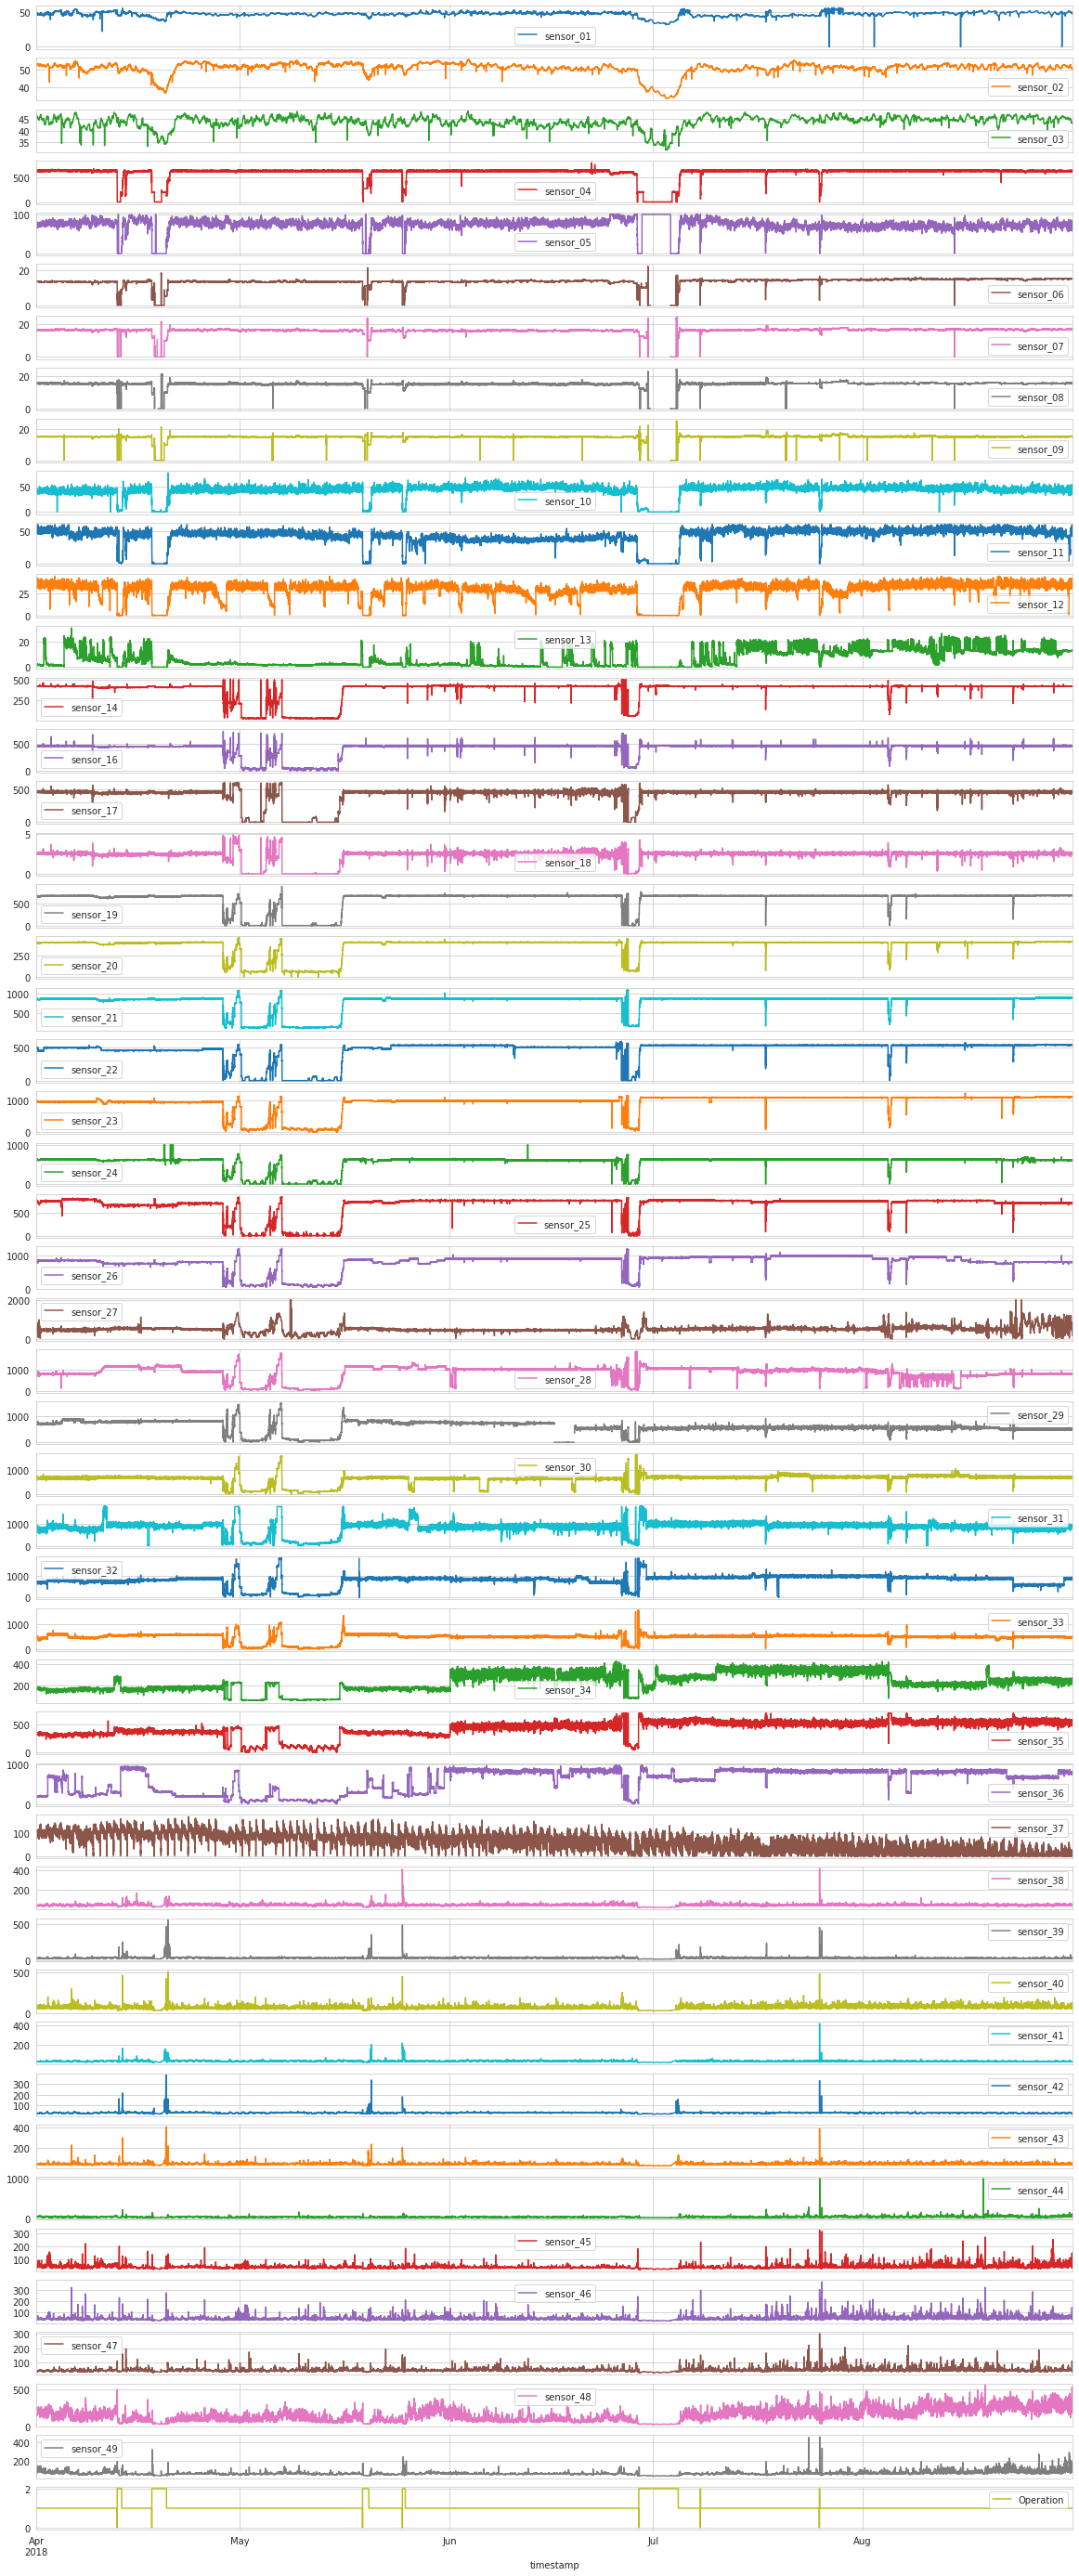

In [21]:
# Plotando os sensores
status = [(df['machine_status'] == 'NORMAL'), (df['machine_status'] == 'BROKEN'), (df['machine_status'] == 'RECOVERING')]
label_encoding = [1, 0, 2]

df['Operation'] = np.select(status, choices, default=0)
df.plot(subplots=True, sharex=True, figsize=(20, 50))

### **Como pode ser visto existem padrões sendo capturados pelos sensores, por exemplo:** 

###**(1,2,3),**

### **(4,5,6,7,8,9),**

### **(10,11,12),**

### **(14,16,17,18),**

### **(19,20,21,22,23,24),**

### **(25,26,28,29,30,31,32,33),**

### **(34,35),**

### **(38,39,40,41,42,43,45,46,47).** 

### **Por sua vez, há sinais que são muito ruidosos e parecem não seguir nenhuma tendência em particular.** 

In [22]:
# utilizando método para preenchimento de dados faltantes
df.fillna(method = 'ffill' , inplace = True)

In [23]:
# Verificando novamente os valores ausentes para garantir
missing_count= df.isnull().sum() # count the number of missing values
value_count=df.isnull().count()
missing_percentage=round(missing_count/value_count *100, 1) # Percentual de valores faltantes
missing_df= pd.DataFrame({"count": missing_count, "percentage": missing_percentage})
print(missing_df)

                count  percentage
sensor_01           0         0.0
sensor_02           0         0.0
sensor_03           0         0.0
sensor_04           0         0.0
sensor_05           0         0.0
sensor_06           0         0.0
sensor_07           0         0.0
sensor_08           0         0.0
sensor_09           0         0.0
sensor_10           0         0.0
sensor_11           0         0.0
sensor_12           0         0.0
sensor_13           0         0.0
sensor_14           0         0.0
sensor_16           0         0.0
sensor_17           0         0.0
sensor_18           0         0.0
sensor_19           0         0.0
sensor_20           0         0.0
sensor_21           0         0.0
sensor_22           0         0.0
sensor_23           0         0.0
sensor_24           0         0.0
sensor_25           0         0.0
sensor_26           0         0.0
sensor_27           0         0.0
sensor_28           0         0.0
sensor_29           0         0.0
sensor_30     

In [24]:
# verificando se os status não são todos do mesmo valor
df.machine_status.unique() 

['NORMAL', 'BROKEN', 'RECOVERING']
Categories (3, object): ['BROKEN', 'NORMAL', 'RECOVERING']

In [25]:
# Analisando uma estatística básica novamente
df.describe()

,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,...,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,Operation
count,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,...,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000
mean,47.597254,50.867093,43.752337,590.664106,73.394872,13.209623,15.498316,14.872618,14.491819,41.469733,...,35.364745,35.453143,43.879263,42.656415,43.094291,48.017908,44.340380,150.886798,57.119821,1.065677
std,3.302558,3.667314,2.418979,144.042134,17.301042,2.901954,3.152707,2.956980,2.956122,12.094658,...,7.898342,10.258958,11.043951,11.575867,12.836955,15.640575,10.441987,82.243950,19.143759,0.247846
min,0.000000,33.159720,31.640620,2.798032,0.000000,0.014468,0.000000,0.028935,0.000000,0.000000,...,20.833330,22.135416,24.479166,25.752316,26.331018,26.331018,27.199070,26.331018,26.620370,0.000000
25%,46.310760,50.390620,42.838539,626.620400,69.976258,13.317420,15.856480,15.147570,15.010130,40.704892,...,32.552080,32.812500,39.583330,36.747684,36.747684,40.509258,39.062500,83.912030,47.743060,1.000000
50%,48.133680,51.649300,44.227428,632.638916,75.576430,13.628470,16.167530,15.451390,15.082470,44.291375,...,34.895832,35.156250,42.968750,40.509260,40.219910,44.849540,42.245370,138.020800,52.662040,1.000000
75%,49.479160,52.777770,45.312500,637.615723,80.911770,14.539930,16.427950,15.697340,15.118630,47.464360,...,37.760410,36.979164,46.614580,45.138890,44.849540,51.215280,46.585650,208.333300,60.763890,1.000000
max,56.727430,56.032990,48.220490,800.000000,99.999880,22.251160,23.596640,24.348960,25.000000,76.106860,...,420.312500,374.218800,408.593700,1000.000000,320.312500,370.370400,303.530100,561.632000,464.409700,2.000000
